# AI 06

**Solution**

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 매개변수 갱신
___

In [2]:
# 6.1 SGD

class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

In [3]:
# 6.2 Momentum

class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, param, grad):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)

        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

In [4]:
# 6.3 AdaGrad

class AdaGrad:

    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)


In [5]:
# Nesterov

class Nesterov:

    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.v[key] *= self.momentum
            self.v[key] -= self.lr * grads[key]
            params[key] += self.momentum * self.momentum * self.v[key]
            params[key] -= (1 + self.momentum) * self.lr * grads[key]


In [7]:
# RMSprop

class RMSprop:

    def __init__(self, lr=0.01, decay_rate = 0.99):
        self.lr = lr
        self.decay_rate = decay_rate
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] *= self.decay_rate
            self.h[key] += (1 - self.decay_rate) * grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)


In [8]:
# Adam

class Adam:

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)


### 가중치의 초깃값
___

In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def ReLU(x):
    return np.maximum(0, x)

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size


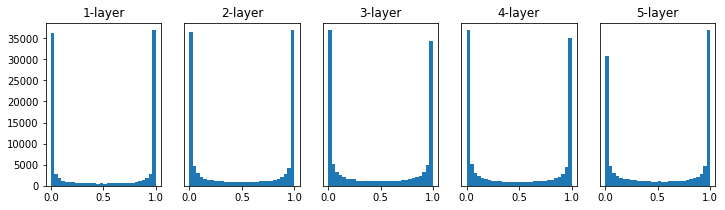

In [10]:
# 6.4

x = input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):

    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 1

    a = np.dot(x, w)
    
    z = sigmoid(a)

    activations[i] = z

plt.figure(figsize=(12,3))
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

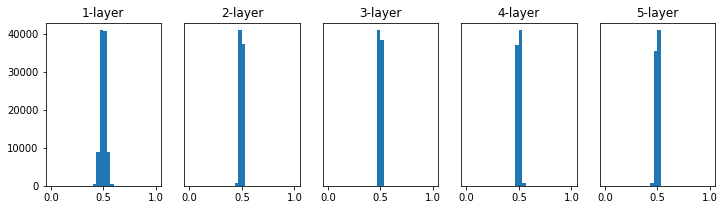

In [11]:
# 6.5 (# 6.4에서 표준편차만 0.01로 변경)

x = input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 0.01

    a = np.dot(x, w)

    z = sigmoid(a)

    activations[i] = z

plt.figure(figsize=(12,3))    
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

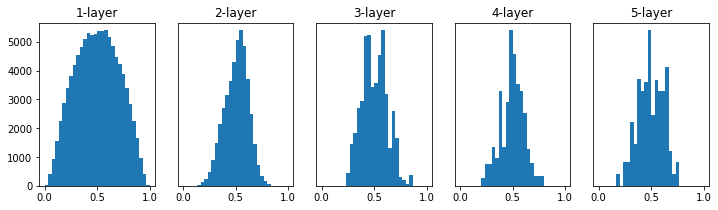

In [12]:
# 6.6 (# 6.5에서 표준편차를 1/sqrt(node_num)으로 변경 )

x = input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    
    a = np.dot(x, w)

    z = sigmoid(a)

    activations[i] = z

plt.figure(figsize=(12,3))
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

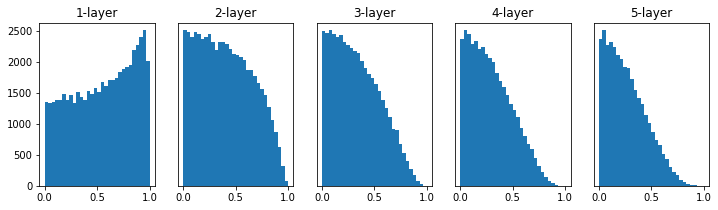

In [13]:
# 6.7 (# 6.6에서 활성화 함수만 simoid에서 tanh로 변경)

x = input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    
    a = np.dot(x, w)

    z = np.tanh(a)

    activations[i] = z

    
plt.figure(figsize=(12,3))
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

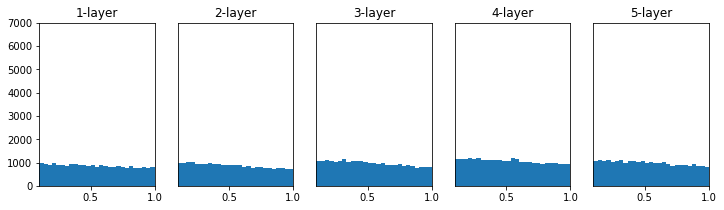

In [14]:
# 6.8 He 초깃값 (# 6.7에서 표준편차만 sqrt(2/node_num)으로 변경)

x = input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

    a = np.dot(x, w)

    z = ReLU(a)

    activations[i] = z

plt.figure(figsize=(12,3))    
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

### 배치 정규화
___

In [15]:
# 6.8 MNIST Dataset

from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

X = X.astype(np.float) / 255.
y = y.astype(np.uint8)

x_train = X[:60000]
x_test = X[60000:]
t_train = y[:60000]
t_test = y[60000:]

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [16]:
# 레이어 클래스

class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = sigmoid(x)
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx
    
    
class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx
    

class Affine:
    def __init__(self, W, b):
        self.W =W
        self.b = b
        
        self.x = None
        self.original_x_shape = None

        self.dW = None
        self.db = None

    def forward(self, x):

        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1)
        self.x = x

        out = np.dot(self.x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        dx = dx.reshape(*self.original_x_shape)
        return dx    
    

class BatchNormalization:

    def __init__(self, gamma, beta, momentum=0.9, running_mean=None, running_var=None):
        self.gamma = gamma
        self.beta = beta
        self.momentum = momentum
        self.input_shape = None 

        self.running_mean = running_mean
        self.running_var = running_var  
        
        self.batch_size = None
        self.xc = None
        self.std = None
        self.dgamma = None
        self.dbeta = None

    def forward(self, x, train_flg=True):
        self.input_shape = x.shape
        if x.ndim != 2:
            N, C, H, W = x.shape
            x = x.reshape(N, -1)

        out = self.__forward(x, train_flg)
        
        return out.reshape(*self.input_shape)
            
    def __forward(self, x, train_flg):
        if self.running_mean is None:
            N, D = x.shape
            self.running_mean = np.zeros(D)
            self.running_var = np.zeros(D)
                        
        if train_flg:
            mu = x.mean(axis=0)
            xc = x - mu
            var = np.mean(xc**2, axis=0)
            std = np.sqrt(var + 10e-7)
            xn = xc / std
            
            self.batch_size = x.shape[0]
            self.xc = xc
            self.xn = xn
            self.std = std
            self.running_mean = self.momentum * self.running_mean + (1-self.momentum) * mu
            self.running_var = self.momentum * self.running_var + (1-self.momentum) * var            
        else:
            xc = x - self.running_mean
            xn = xc / ((np.sqrt(self.running_var + 10e-7)))
            
        out = self.gamma * xn + self.beta 
        return out

    def backward(self, dout):
        if dout.ndim != 2:
            N, C, H, W = dout.shape
            dout = dout.reshape(N, -1)

        dx = self.__backward(dout)

        dx = dx.reshape(*self.input_shape)
        return dx

    def __backward(self, dout):
        dbeta = dout.sum(axis=0)
        dgamma = np.sum(self.xn * dout, axis=0)
        dxn = self.gamma * dout
        dxc = dxn / self.std
        dstd = -np.sum((dxn * self.xc) / (self.std * self.std), axis=0)
        dvar = 0.5 * dstd / self.std
        dxc += (2.0 / self.batch_size) * self.xc * dvar
        dmu = np.sum(dxc, axis=0)
        dx = dxc - dmu / self.batch_size
        
        self.dgamma = dgamma
        self.dbeta = dbeta
        
        return dx
    

class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None
        self.t = None

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        if self.t.size == self.y.size:
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
        
        return dx
    



In [17]:
# MultiLayerNet

from collections import OrderedDict

class MultiLayerNet:
    """
    Weight Decay, Dropout,Batch Normalization

    Parameters
    ----------
    input_size : 입력 노드 갯수
    hidden_size_list : 은닉층 노드 갯수 리스트 （e.g. [100, 100, 100]）
    output_size : 출력 노드 갯수
    activation : 'relu' or 'sigmoid'
    weight_init_std : 초깃값 표준편차 （e.g. 0.01）
        'relu' 또는 'he'를 지정할 경우 he 초깃값 설정
        'sigmoid' 또는 'xavier'를 지정할 경우 xavier 초깃값 설정
    weight_decay_lambda : Weight Decay（L2 norm）
    use_dropout: Dropout 사용 여부
    dropout_ratio : Dropout 비율
    use_batchNorm: Batch Normalization 사용 여부
    """

    def __init__(self, input_size, hidden_size_list, output_size,
                 activation='relu', weight_init_std='relu', weight_decay_lambda=0, 
                 use_dropout = False, dropout_ratio = 0.5, use_batchnorm=False):
        
        # 파라미터 저장
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size_list = hidden_size_list
        self.hidden_layer_num = len(hidden_size_list)
        self.use_dropout = use_dropout
        self.weight_decay_lambda = weight_decay_lambda
        self.use_batchnorm = use_batchnorm

        # 가중치 초기화        
        self.params = {}
        all_size_list = [self.input_size] + self.hidden_size_list + [self.output_size]
        for idx in range(1, len(all_size_list)):
            scale = weight_init_std
            # 만약 weight_init_std가 relu나 he일 경우
            if str(weight_init_std).lower() in ('relu', 'he'):
                # He 초깃값 적용
                scale = np.sqrt(2.0 / all_size_list[idx - 1])
            # 만약 weight_init_std가 sigmoid나 zavier의 경우
            elif str(weight_init_std).lower() in ('sigmoid', 'xavier'):
                # Xavier 초깃값 적용
                scale = np.sqrt(1.0 / all_size_list[idx - 1])
            # 가중치 초기화
            self.params['W' + str(idx)] = scale * np.random.randn(all_size_list[idx-1], all_size_list[idx])
            self.params['b' + str(idx)] = np.zeros(all_size_list[idx])

        # layers 초기화
        activation_layer = {'sigmoid': Sigmoid, 'relu': Relu}
        self.layers = OrderedDict()
        for idx in range(1, self.hidden_layer_num+1):

            # Affine layer
            self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)],
                                                      self.params['b' + str(idx)])
            # Batch normalization 사용하는 경우
            if self.use_batchnorm:
                self.params['gamma' + str(idx)] = np.ones(hidden_size_list[idx-1])
                self.params['beta' + str(idx)] = np.zeros(hidden_size_list[idx-1])
                self.layers['BatchNorm' + str(idx)] = BatchNormalization(self.params['gamma' + str(idx)], self.params['beta' + str(idx)])
            
            # 활성화 함수 layer
            self.layers['Activation_function' + str(idx)] = activation_layer[activation]()
            
            # Dropout
            if self.use_dropout:
                self.layers['Dropout' + str(idx)] = Dropout(dropout_ratio)

        # 마지막 Affine layer
        idx = self.hidden_layer_num + 1
        self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)], self.params['b' + str(idx)])

        # SoftmaxWithLoss layer
        self.last_layer = SoftmaxWithLoss()


    def predict(self, x, train_flg=False):
        # 모든 layer에 대해서 순차적으로 forward
        for key, layer in self.layers.items():
            # Dropout과 BatchNorm의 경우, train과 test를 다르게 처리
            if "Dropout" in key or "BatchNorm" in key:
                x = layer.forward(x, train_flg)
            else:
                x = layer.forward(x)

        return x

    def loss(self, x, t, train_flg=False):
        # 순전파
        y = self.predict(x, train_flg)

        # Weight decay
        weight_decay = 0
        for idx in range(1, self.hidden_layer_num + 2):
            W = self.params['W' + str(idx)]
            weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)

        return self.last_layer.forward(y, t) + weight_decay

    def accuracy(self, X, T):
        # 순전파
        Y = self.predict(X, train_flg=False)
        # 출력값 중 가장 큰 값의 인덱스
        Y = np.argmax(Y, axis=1)
        # 정답 인덱스
        if T.ndim != 1 : 
            T = np.argmax(T, axis=1)
        # 정확도 
        accuracy = np.sum(Y == T) / float(X.shape[0])
        return accuracy

       
    def gradient(self, x, t):
        # 순전파
        self.loss(x, t, train_flg=True)

        # 모든 layer에 대해서 역전파
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 구해진 기울기를 grads에 저장 후 return
        grads = {}
        for idx in range(1, self.hidden_layer_num+2):
            grads['W' + str(idx)] = self.layers['Affine' + str(idx)].dW + self.weight_decay_lambda * self.params['W' + str(idx)]
            grads['b' + str(idx)] = self.layers['Affine' + str(idx)].db

            if self.use_batchnorm and idx != self.hidden_layer_num+1:
                grads['gamma' + str(idx)] = self.layers['BatchNorm' + str(idx)].dgamma
                grads['beta' + str(idx)] = self.layers['BatchNorm' + str(idx)].dbeta

        return grads

In [18]:
# 6.9 

x_train1 = x_train[:1000]
t_train1 = t_train[:1000]

max_epochs = 20
train_size = x_train1.shape[0]
batch_size = 100
learning_rate = 0.01

def _train(weight_init_std):
    bn_network = MultiLayerNet(input_size=784, 
                                hidden_size_list=[100, 100, 100, 100, 100], 
                                output_size=10, weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNet(input_size=784, 
                             hidden_size_list=[100, 100, 100, 100, 100], 
                             output_size=10, weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train1[batch_mask]
        t_batch = t_train1[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train1, t_train1)
            bn_train_acc = bn_network.accuracy(x_train1, t_train1)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


============== 1/16 ==============
epoch:0 | 0.116 - 0.14


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:102: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in less_equal


epoch:1 | 0.097 - 0.122
epoch:2 | 0.097 - 0.116
epoch:3 | 0.097 - 0.106
epoch:4 | 0.097 - 0.112
epoch:5 | 0.097 - 0.135
epoch:6 | 0.097 - 0.157
epoch:7 | 0.097 - 0.194
epoch:8 | 0.097 - 0.197
epoch:9 | 0.097 - 0.21
epoch:10 | 0.097 - 0.238
epoch:11 | 0.097 - 0.249
epoch:12 | 0.097 - 0.268
epoch:13 | 0.097 - 0.287
epoch:14 | 0.097 - 0.299
epoch:15 | 0.097 - 0.316
epoch:16 | 0.097 - 0.336
epoch:17 | 0.097 - 0.347
epoch:18 | 0.097 - 0.361


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.368
============== 2/16 ==============
epoch:0 | 0.116 - 0.086


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in less_equal
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:102: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


epoch:1 | 0.097 - 0.113
epoch:2 | 0.097 - 0.112
epoch:3 | 0.097 - 0.144
epoch:4 | 0.097 - 0.165
epoch:5 | 0.097 - 0.177
epoch:6 | 0.097 - 0.223
epoch:7 | 0.097 - 0.262
epoch:8 | 0.097 - 0.286
epoch:9 | 0.097 - 0.316
epoch:10 | 0.097 - 0.336
epoch:11 | 0.097 - 0.352
epoch:12 | 0.097 - 0.373
epoch:13 | 0.097 - 0.391
epoch:14 | 0.097 - 0.407
epoch:15 | 0.097 - 0.42
epoch:16 | 0.097 - 0.444
epoch:17 | 0.097 - 0.466
epoch:18 | 0.097 - 0.477


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.482
============== 3/16 ==============
epoch:0 | 0.107 - 0.1
epoch:1 | 0.371 - 0.087
epoch:2 | 0.504 - 0.134
epoch:3 | 0.613 - 0.175
epoch:4 | 0.723 - 0.224
epoch:5 | 0.781 - 0.265
epoch:6 | 0.825 - 0.31
epoch:7 | 0.843 - 0.343
epoch:8 | 0.893 - 0.385
epoch:9 | 0.91 - 0.402
epoch:10 | 0.938 - 0.444
epoch:11 | 0.957 - 0.473
epoch:12 | 0.961 - 0.503
epoch:13 | 0.968 - 0.522
epoch:14 | 0.975 - 0.549
epoch:15 | 0.974 - 0.582
epoch:16 | 0.983 - 0.597
epoch:17 | 0.989 - 0.622
epoch:18 | 0.988 - 0.631


No handles with labels found to put in legend.


epoch:19 | 0.991 - 0.654
============== 4/16 ==============
epoch:0 | 0.116 - 0.094
epoch:1 | 0.2 - 0.135
epoch:2 | 0.31 - 0.194
epoch:3 | 0.428 - 0.271
epoch:4 | 0.522 - 0.33
epoch:5 | 0.583 - 0.384
epoch:6 | 0.621 - 0.441
epoch:7 | 0.665 - 0.474
epoch:8 | 0.697 - 0.518
epoch:9 | 0.711 - 0.548
epoch:10 | 0.731 - 0.593
epoch:11 | 0.754 - 0.62
epoch:12 | 0.768 - 0.647
epoch:13 | 0.778 - 0.675
epoch:14 | 0.801 - 0.695
epoch:15 | 0.818 - 0.713
epoch:16 | 0.826 - 0.73
epoch:17 | 0.831 - 0.748
epoch:18 | 0.841 - 0.756


No handles with labels found to put in legend.


epoch:19 | 0.843 - 0.77
============== 5/16 ==============
epoch:0 | 0.055 - 0.119
epoch:1 | 0.06 - 0.14
epoch:2 | 0.06 - 0.233
epoch:3 | 0.063 - 0.373
epoch:4 | 0.072 - 0.461
epoch:5 | 0.075 - 0.539
epoch:6 | 0.085 - 0.595
epoch:7 | 0.099 - 0.64
epoch:8 | 0.115 - 0.683
epoch:9 | 0.126 - 0.732
epoch:10 | 0.138 - 0.761
epoch:11 | 0.161 - 0.786
epoch:12 | 0.181 - 0.803
epoch:13 | 0.194 - 0.817
epoch:14 | 0.214 - 0.839
epoch:15 | 0.224 - 0.851
epoch:16 | 0.237 - 0.854
epoch:17 | 0.247 - 0.866
epoch:18 | 0.252 - 0.872


No handles with labels found to put in legend.


epoch:19 | 0.263 - 0.881
============== 6/16 ==============
epoch:0 | 0.124 - 0.12
epoch:1 | 0.108 - 0.237
epoch:2 | 0.119 - 0.493
epoch:3 | 0.151 - 0.597
epoch:4 | 0.119 - 0.64
epoch:5 | 0.116 - 0.694
epoch:6 | 0.116 - 0.722
epoch:7 | 0.117 - 0.77
epoch:8 | 0.116 - 0.794
epoch:9 | 0.116 - 0.82
epoch:10 | 0.116 - 0.838
epoch:11 | 0.116 - 0.845
epoch:12 | 0.116 - 0.869
epoch:13 | 0.147 - 0.884
epoch:14 | 0.181 - 0.894
epoch:15 | 0.128 - 0.908
epoch:16 | 0.117 - 0.915
epoch:17 | 0.117 - 0.922
epoch:18 | 0.117 - 0.928


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.937
============== 7/16 ==============
epoch:0 | 0.136 - 0.109
epoch:1 | 0.117 - 0.352
epoch:2 | 0.117 - 0.618
epoch:3 | 0.117 - 0.702
epoch:4 | 0.117 - 0.754
epoch:5 | 0.117 - 0.784
epoch:6 | 0.117 - 0.837
epoch:7 | 0.117 - 0.86
epoch:8 | 0.117 - 0.892
epoch:9 | 0.117 - 0.907
epoch:10 | 0.117 - 0.934
epoch:11 | 0.117 - 0.949
epoch:12 | 0.117 - 0.959
epoch:13 | 0.117 - 0.964
epoch:14 | 0.117 - 0.964
epoch:15 | 0.117 - 0.969
epoch:16 | 0.117 - 0.974
epoch:17 | 0.117 - 0.977
epoch:18 | 0.117 - 0.984


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.986
============== 8/16 ==============
epoch:0 | 0.099 - 0.163
epoch:1 | 0.116 - 0.352
epoch:2 | 0.116 - 0.617
epoch:3 | 0.117 - 0.723
epoch:4 | 0.117 - 0.764
epoch:5 | 0.117 - 0.796
epoch:6 | 0.117 - 0.832
epoch:7 | 0.117 - 0.874
epoch:8 | 0.117 - 0.918
epoch:9 | 0.117 - 0.948
epoch:10 | 0.117 - 0.964
epoch:11 | 0.117 - 0.967
epoch:12 | 0.117 - 0.984
epoch:13 | 0.117 - 0.99
epoch:14 | 0.117 - 0.988
epoch:15 | 0.117 - 0.993
epoch:16 | 0.117 - 0.996
epoch:17 | 0.117 - 0.997
epoch:18 | 0.117 - 0.998


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.998
============== 9/16 ==============
epoch:0 | 0.105 - 0.095
epoch:1 | 0.116 - 0.448
epoch:2 | 0.105 - 0.821
epoch:3 | 0.116 - 0.884
epoch:4 | 0.116 - 0.936
epoch:5 | 0.117 - 0.955
epoch:6 | 0.116 - 0.967
epoch:7 | 0.116 - 0.981
epoch:8 | 0.116 - 0.986
epoch:9 | 0.116 - 0.994
epoch:10 | 0.116 - 0.998
epoch:11 | 0.116 - 0.979
epoch:12 | 0.117 - 0.999
epoch:13 | 0.117 - 1.0
epoch:14 | 0.117 - 1.0
epoch:15 | 0.117 - 1.0
epoch:16 | 0.117 - 1.0
epoch:17 | 0.117 - 1.0
epoch:18 | 0.117 - 1.0


No handles with labels found to put in legend.


epoch:19 | 0.117 - 1.0
============== 10/16 ==============
epoch:0 | 0.105 - 0.156
epoch:1 | 0.099 - 0.537
epoch:2 | 0.099 - 0.788
epoch:3 | 0.116 - 0.842
epoch:4 | 0.117 - 0.836
epoch:5 | 0.116 - 0.864
epoch:6 | 0.116 - 0.882
epoch:7 | 0.116 - 0.951
epoch:8 | 0.116 - 0.978
epoch:9 | 0.117 - 0.975
epoch:10 | 0.117 - 0.989
epoch:11 | 0.116 - 0.989
epoch:12 | 0.116 - 0.993
epoch:13 | 0.117 - 0.996
epoch:14 | 0.117 - 0.98
epoch:15 | 0.116 - 0.997
epoch:16 | 0.116 - 0.99
epoch:17 | 0.116 - 0.99
epoch:18 | 0.116 - 0.999


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.995
============== 11/16 ==============
epoch:0 | 0.099 - 0.214
epoch:1 | 0.116 - 0.435
epoch:2 | 0.117 - 0.658
epoch:3 | 0.1 - 0.676
epoch:4 | 0.1 - 0.675
epoch:5 | 0.117 - 0.709
epoch:6 | 0.117 - 0.796
epoch:7 | 0.117 - 0.773
epoch:8 | 0.117 - 0.824
epoch:9 | 0.117 - 0.805
epoch:10 | 0.117 - 0.794
epoch:11 | 0.117 - 0.832
epoch:12 | 0.117 - 0.85
epoch:13 | 0.116 - 0.816
epoch:14 | 0.116 - 0.811
epoch:15 | 0.116 - 0.815
epoch:16 | 0.116 - 0.886
epoch:17 | 0.116 - 0.822
epoch:18 | 0.116 - 0.975


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.96
============== 12/16 ==============
epoch:0 | 0.093 - 0.171
epoch:1 | 0.116 - 0.528
epoch:2 | 0.116 - 0.632
epoch:3 | 0.116 - 0.612
epoch:4 | 0.117 - 0.669
epoch:5 | 0.117 - 0.713
epoch:6 | 0.117 - 0.759
epoch:7 | 0.117 - 0.784
epoch:8 | 0.117 - 0.789
epoch:9 | 0.117 - 0.784
epoch:10 | 0.117 - 0.785
epoch:11 | 0.117 - 0.786
epoch:12 | 0.117 - 0.799
epoch:13 | 0.117 - 0.794
epoch:14 | 0.117 - 0.804
epoch:15 | 0.117 - 0.794
epoch:16 | 0.117 - 0.805
epoch:17 | 0.117 - 0.797
epoch:18 | 0.117 - 0.802


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.809
============== 13/16 ==============
epoch:0 | 0.1 - 0.138
epoch:1 | 0.117 - 0.445
epoch:2 | 0.117 - 0.59
epoch:3 | 0.117 - 0.627
epoch:4 | 0.117 - 0.617
epoch:5 | 0.117 - 0.675
epoch:6 | 0.117 - 0.691
epoch:7 | 0.117 - 0.696
epoch:8 | 0.117 - 0.686
epoch:9 | 0.117 - 0.698
epoch:10 | 0.117 - 0.636
epoch:11 | 0.117 - 0.71
epoch:12 | 0.117 - 0.713
epoch:13 | 0.117 - 0.722
epoch:14 | 0.117 - 0.802
epoch:15 | 0.117 - 0.802
epoch:16 | 0.117 - 0.804
epoch:17 | 0.117 - 0.811
epoch:18 | 0.117 - 0.812


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.809
============== 14/16 ==============
epoch:0 | 0.097 - 0.123
epoch:1 | 0.116 - 0.409
epoch:2 | 0.117 - 0.499
epoch:3 | 0.117 - 0.505
epoch:4 | 0.116 - 0.556
epoch:5 | 0.116 - 0.582
epoch:6 | 0.116 - 0.597
epoch:7 | 0.116 - 0.602
epoch:8 | 0.116 - 0.604
epoch:9 | 0.116 - 0.604
epoch:10 | 0.116 - 0.602
epoch:11 | 0.116 - 0.601
epoch:12 | 0.116 - 0.605
epoch:13 | 0.117 - 0.608
epoch:14 | 0.117 - 0.689
epoch:15 | 0.117 - 0.697
epoch:16 | 0.117 - 0.678
epoch:17 | 0.117 - 0.7
epoch:18 | 0.117 - 0.696


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.695
============== 15/16 ==============
epoch:0 | 0.105 - 0.216
epoch:1 | 0.116 - 0.315
epoch:2 | 0.116 - 0.294
epoch:3 | 0.116 - 0.315
epoch:4 | 0.116 - 0.411
epoch:5 | 0.116 - 0.419
epoch:6 | 0.116 - 0.42
epoch:7 | 0.116 - 0.416
epoch:8 | 0.116 - 0.418
epoch:9 | 0.116 - 0.427
epoch:10 | 0.116 - 0.411
epoch:11 | 0.116 - 0.432
epoch:12 | 0.116 - 0.42
epoch:13 | 0.116 - 0.419
epoch:14 | 0.116 - 0.43
epoch:15 | 0.117 - 0.433
epoch:16 | 0.117 - 0.434
epoch:17 | 0.117 - 0.431
epoch:18 | 0.117 - 0.483


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.423
============== 16/16 ==============
epoch:0 | 0.117 - 0.176
epoch:1 | 0.117 - 0.25
epoch:2 | 0.117 - 0.403
epoch:3 | 0.117 - 0.44
epoch:4 | 0.117 - 0.469
epoch:5 | 0.117 - 0.46
epoch:6 | 0.117 - 0.446
epoch:7 | 0.117 - 0.437
epoch:8 | 0.117 - 0.438
epoch:9 | 0.117 - 0.496
epoch:10 | 0.117 - 0.46
epoch:11 | 0.117 - 0.505
epoch:12 | 0.117 - 0.51
epoch:13 | 0.117 - 0.583
epoch:14 | 0.117 - 0.599
epoch:15 | 0.117 - 0.609
epoch:16 | 0.117 - 0.605
epoch:17 | 0.117 - 0.603
epoch:18 | 0.117 - 0.612
epoch:19 | 0.117 - 0.616


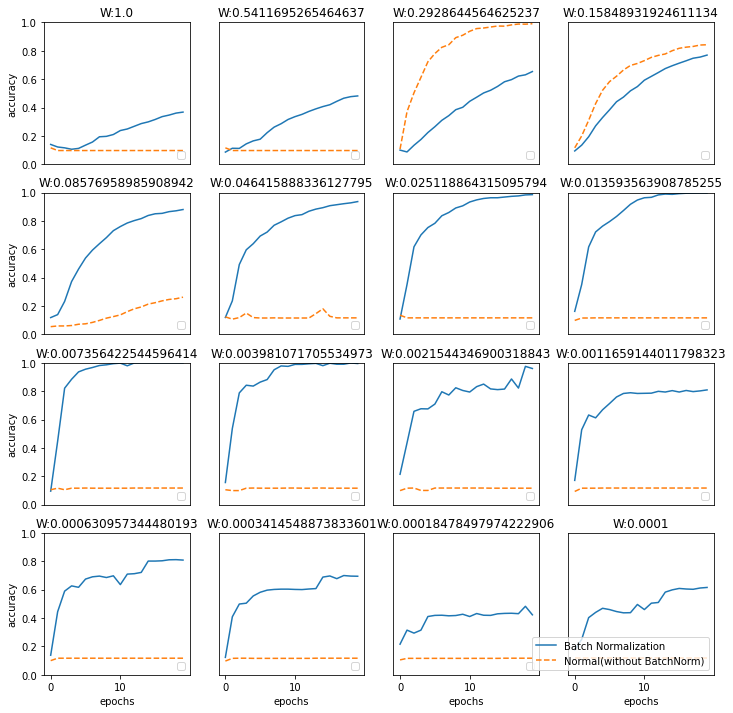

In [19]:
# 6.10

weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

plt.figure(figsize=(12,12))

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = _train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

### 바른 학습을 위해
___

epoch: 0, train acc: 0.10333333333333333, test acc: 0.1004
epoch: 1, train acc: 0.14333333333333334, test acc: 0.1259
epoch: 2, train acc: 0.18, test acc: 0.1572
epoch: 3, train acc: 0.22, test acc: 0.1814
epoch: 4, train acc: 0.26666666666666666, test acc: 0.2
epoch: 5, train acc: 0.31333333333333335, test acc: 0.2287
epoch: 6, train acc: 0.3433333333333333, test acc: 0.2468
epoch: 7, train acc: 0.38, test acc: 0.2594
epoch: 8, train acc: 0.4166666666666667, test acc: 0.2772
epoch: 9, train acc: 0.45, test acc: 0.2962
epoch: 10, train acc: 0.45, test acc: 0.3042
epoch: 11, train acc: 0.48, test acc: 0.3159
epoch: 12, train acc: 0.48, test acc: 0.3293
epoch: 13, train acc: 0.5033333333333333, test acc: 0.3439
epoch: 14, train acc: 0.5266666666666666, test acc: 0.3681
epoch: 15, train acc: 0.5266666666666666, test acc: 0.3672
epoch: 16, train acc: 0.54, test acc: 0.3728
epoch: 17, train acc: 0.54, test acc: 0.3709
epoch: 18, train acc: 0.54, test acc: 0.3831
epoch: 19, train acc: 0.5633

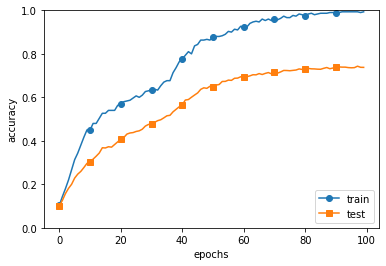

In [20]:
# 6.11 Overfitting

x_train1 = x_train[:300]
t_train1 = t_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = SGD(lr=0.01)

max_epochs = 100
train_size = x_train1.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train1[batch_mask]
    t_batch = t_train1[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train1, t_train1)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print('epoch: {}, train acc: {}, test acc: {}'.format(epoch_cnt, train_acc, test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프

markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

epoch: 0, train acc: 0.12, test acc: 0.1018
epoch: 1, train acc: 0.14666666666666667, test acc: 0.1085
epoch: 2, train acc: 0.16666666666666666, test acc: 0.1216
epoch: 3, train acc: 0.18666666666666668, test acc: 0.1383
epoch: 4, train acc: 0.20666666666666667, test acc: 0.1522
epoch: 5, train acc: 0.26, test acc: 0.1834
epoch: 6, train acc: 0.30666666666666664, test acc: 0.2044
epoch: 7, train acc: 0.34, test acc: 0.2272
epoch: 8, train acc: 0.35333333333333333, test acc: 0.2517
epoch: 9, train acc: 0.37, test acc: 0.2658
epoch: 10, train acc: 0.38333333333333336, test acc: 0.2837
epoch: 11, train acc: 0.38666666666666666, test acc: 0.297
epoch: 12, train acc: 0.4, test acc: 0.3094
epoch: 13, train acc: 0.43333333333333335, test acc: 0.3205
epoch: 14, train acc: 0.44666666666666666, test acc: 0.3206
epoch: 15, train acc: 0.4633333333333333, test acc: 0.3417
epoch: 16, train acc: 0.47333333333333333, test acc: 0.3504
epoch: 17, train acc: 0.47333333333333333, test acc: 0.3623
epoch: 1

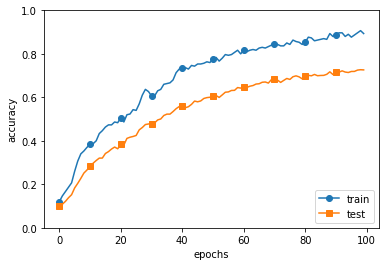

In [21]:
# 6.12 Weight decay

x_train1 = x_train[:300]
t_train1 = t_train[:300]

weight_decay_lambda = 0.1

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], 
                              output_size=10, weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 100
train_size = x_train1.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train1[batch_mask]
    t_batch = t_train1[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train1, t_train1)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print('epoch: {}, train acc: {}, test acc: {}'.format(epoch_cnt, train_acc, test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

            
# 그래프

markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [22]:
# Trainer class

class Trainer:

    def __init__(self, network, x_train, t_train, x_test, t_test,
                 epochs=20, mini_batch_size=100,
                 optimizer='SGD', optimizer_param={'lr':0.01}, 
                 evaluate_sample_num_per_epoch=None, verbose=True):
        
        self.network = network
        self.verbose = verbose
        self.x_train = x_train
        self.t_train = t_train
        self.x_test = x_test
        self.t_test = t_test
        self.epochs = epochs
        self.batch_size = mini_batch_size
        self.evaluate_sample_num_per_epoch = evaluate_sample_num_per_epoch

        # optimizer
        optimizer_class_dict = {'sgd':SGD, 'momentum':Momentum, 'nesterov':Nesterov,
                                'adagrad':AdaGrad, 'rmsprpo':RMSprop, 'adam':Adam}
        self.optimizer = optimizer_class_dict[optimizer.lower()](**optimizer_param)
        
        self.train_size = x_train.shape[0]
        self.iter_per_epoch = max(self.train_size / mini_batch_size, 1)
        self.max_iter = int(epochs * self.iter_per_epoch)
        self.current_iter = 0
        self.current_epoch = 0
        
        self.train_loss_list = []
        self.train_acc_list = []
        self.test_acc_list = []

    def train_step(self):
        batch_mask = np.random.choice(self.train_size, self.batch_size)
        x_batch = self.x_train[batch_mask]
        t_batch = self.t_train[batch_mask]
        
        grads = self.network.gradient(x_batch, t_batch)
        self.optimizer.update(self.network.params, grads)
        
        loss = self.network.loss(x_batch, t_batch)
        self.train_loss_list.append(loss)
        if self.verbose: print("train loss:" + str(loss))
        
        if self.current_iter % self.iter_per_epoch == 0:
            self.current_epoch += 1
            
            x_train_sample, t_train_sample = self.x_train, self.t_train
            x_test_sample, t_test_sample = self.x_test, self.t_test
            if not self.evaluate_sample_num_per_epoch is None:
                t = self.evaluate_sample_num_per_epoch
                x_train_sample, t_train_sample = self.x_train[:t], self.t_train[:t]
                x_test_sample, t_test_sample = self.x_test[:t], self.t_test[:t]
                
            train_acc = self.network.accuracy(x_train_sample, t_train_sample)
            test_acc = self.network.accuracy(x_test_sample, t_test_sample)
            self.train_acc_list.append(train_acc)
            self.test_acc_list.append(test_acc)

            if self.verbose: print("=== epoch:" + str(self.current_epoch) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc) + " ===")
        self.current_iter += 1

    def train(self):
        for i in range(self.max_iter):
            self.train_step()

        test_acc = self.network.accuracy(self.x_test, self.t_test)

        if self.verbose:
            print("=============== Final Test Accuracy ===============")
            print("test acc:" + str(test_acc))



In [23]:
# 6.13 Dropout

class Dropout:

    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

        

train loss:2.316646660207735
=== epoch:1, train acc:0.10666666666666667, test acc:0.1018 ===
train loss:2.323021711366017
train loss:2.3119376662750546
train loss:2.314862949560205
=== epoch:2, train acc:0.10666666666666667, test acc:0.102 ===
train loss:2.2942507178113813
train loss:2.3019892885202036
train loss:2.3035579164456728
=== epoch:3, train acc:0.11333333333333333, test acc:0.1031 ===
train loss:2.3038295710808736
train loss:2.318758166205006
train loss:2.305250579648265
=== epoch:4, train acc:0.12, test acc:0.103 ===
train loss:2.2810377503405035
train loss:2.308661224575287
train loss:2.274276242482374
=== epoch:5, train acc:0.11666666666666667, test acc:0.1051 ===
train loss:2.3002850077448223
train loss:2.3163304597344174
train loss:2.2990718640128325
=== epoch:6, train acc:0.12, test acc:0.1058 ===
train loss:2.302992229481521
train loss:2.298564089222109
train loss:2.301044254654053
=== epoch:7, train acc:0.12333333333333334, test acc:0.1098 ===
train loss:2.28550054752

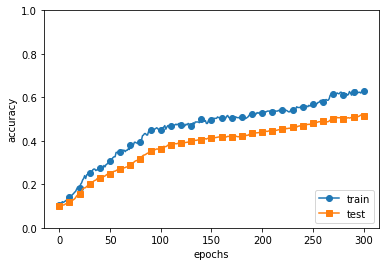

In [24]:
# 6.14

x_train1 = x_train[:300]
t_train1 = t_train[:300]

use_dropout = True
dropout_ratio = 0.2

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], 
                              output_size=10, use_dropout=use_dropout, dropout_ratio=dropout_ratio)

trainer = Trainer(network, x_train1, t_train1, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### 하이퍼파라미터 튜닝
---

In [25]:

def shuffle_dataset(x, t):

    permutation = np.random.permutation(x.shape[0])
    x = x[permutation,:] if x.ndim == 2 else x[permutation,:,:,:]
    t = t[permutation]

    return x, t

In [26]:
# 6.15 검증 데이터

# 훈련 데이터를 섞는다.
x_train1, t_train1 = shuffle_dataset(x_train, t_train)

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train1.shape[0] * validation_rate)

x_val = x_train1[ : validation_num]
t_val = t_train1[ : validation_num]
x_train1 = x_train1[validation_num : ]
t_train1 = t_train1[validation_num : ]


In [27]:
# 6.16 가중치 감소 계수와 학습율

weight_decay = 10 ** np.random.uniform(-8, -4)
lr = 10 ** np.random.uniform(-6, -2)

In [28]:
# 6.17


x_train1 = x_train[:500]
t_train1 = t_train[:500]

x_train1, t_train1 = shuffle_dataset(x_train1, t_train1)

validation_rate = 0.20
validation_num = int(x_train1.shape[0] * validation_rate)

x_val = x_train1[:validation_num]
t_val = t_train1[:validation_num]
x_train1 = x_train1[validation_num:]
t_train1 = t_train1[validation_num:]


def _train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train1, t_train1, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


val acc: 0.09 | lr: 2.595683842493275e-06, weight decay: 1.18084990049195e-06
val acc: 0.19 | lr: 8.512281860987435e-05, weight decay: 3.157865136573701e-06
val acc: 0.1 | lr: 8.185237181723465e-06, weight decay: 3.6815322059383196e-05
val acc: 0.34 | lr: 0.003333222276287534, weight decay: 2.341687691460626e-06
val acc: 0.14 | lr: 1.7735315162425227e-06, weight decay: 3.2470834200806366e-05
val acc: 0.11 | lr: 0.00013512647743437812, weight decay: 9.927717060079093e-05
val acc: 0.31 | lr: 0.0006130945309948248, weight decay: 1.4668921116555545e-06
val acc: 0.2 | lr: 1.2954276358714539e-06, weight decay: 2.304305877216338e-07
val acc: 0.58 | lr: 0.0029501814764699382, weight decay: 5.21308061988458e-08
val acc: 0.13 | lr: 0.0006100992628817245, weight decay: 1.7075148064529915e-07
val acc: 0.05 | lr: 2.08975344606508e-06, weight decay: 5.398938602586676e-05
val acc: 0.04 | lr: 0.00033028071768583824, weight decay: 5.914173882390372e-06
val acc: 0.11 | lr: 0.00010032811234812315, weight

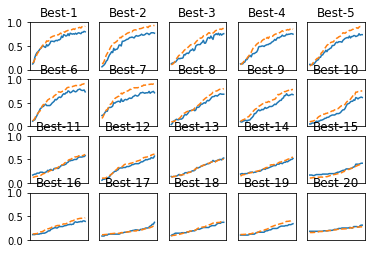

In [29]:
# 6.18

optimization_trial = 100
results_val = {}
results_train = {}

for _ in range(optimization_trial):
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================
    val_acc_list, train_acc_list = _train(lr, weight_decay)
    print("val acc: {} | lr: {}, weight decay: {}".format(val_acc_list[-1], lr, weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()